In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import re

In [2]:
def convert_duration_to_seconds(duration):
    pattern = r'PT(\d+H)?(\d+M)?(\d+S)?'
    hours, minutes, seconds = re.match(pattern, duration).groups()
    
    total_seconds = 0
    if hours:
        total_seconds += int(hours[:-1]) * 3600
    if minutes:
        total_seconds += int(minutes[:-1]) * 60
    if seconds:
        total_seconds += int(seconds[:-1])
    
    return total_seconds

In [38]:
train_df = pd.read_csv("../data/dataset/train/train.csv")
validate_df = pd.read_csv("../data/dataset/validation/validation.csv")

In [39]:
train_audio_df = pd.read_csv("../data/dataset/train/train_audio_clean.csv")
validate_audio_df = pd.read_csv("../data/dataset/validation/validation_audio_clean.csv")
train_audio2_df = pd.read_csv("../data/dataset/train/train_audio2.csv")
train_audio2_2_df = pd.read_csv("../data/dataset/train/train_audio2_2.csv")
validate_audio2_df = pd.read_csv("../data/dataset/validation/validation_audio2.csv")
validate_audio2_2_df = pd.read_csv("../data/dataset/validation/validation_audio2_2.csv")
train_visual_df = pd.read_csv("../data/dataset/train/train_visual.csv")
validate_visual_df = pd.read_csv("../data/dataset/validation/validation_visual.csv")
train_word_count_df = pd.read_csv("../data/dataset/train/train_word_count.csv")
validate_word_count_df = pd.read_csv("../data/dataset/validation/validation_word_count.csv")

In [40]:
# Merging in audio and visual data
train_df = train_df.merge(train_visual_df, on='id')
train_df = train_df.merge(train_audio_df, on='id')
train_df = train_df.merge(train_audio2_2_df, on='id')
train_df = train_df.merge(train_word_count_df, on='id')
validate_df = validate_df.merge(validate_visual_df, on='id')
validate_df = validate_df.merge(validate_audio_df, on='id')
validate_df = validate_df.merge(validate_audio2_2_df, on='id')
validate_df = validate_df.merge(validate_word_count_df, on='id')

In [74]:
duration_train = train_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
X_train = train_df[['speech_rate', 'pitch_mean', 'Equation Indicator Percentage']]
X_train['duration'] = duration_train

# y_train = train_df['likes_per_view']
y_train = train_df['views_per_week']

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_10956\4116264386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['duration'] = duration_train


In [75]:
duration_validation = validate_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
X_validate = validate_df[['speech_rate', 'pitch_mean', 'Equation Indicator Percentage']]
X_validate['duration'] = duration_validation

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_10956\2357364417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validate['duration'] = duration_validation


In [76]:
reg_tree = DecisionTreeRegressor(max_depth=6)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [77]:
predictions = reg_tree.predict(X_validate)
print(predictions)

[ 571.08327465  337.97316801   90.47106461  117.13757393  571.08327465
   90.47106461  117.13757393  117.13757393  117.13757393  337.97316801
  117.13757393  337.97316801  337.97316801  117.13757393  337.97316801
  302.87541326  117.13757393  337.97316801  337.97316801  565.02610114
  337.97316801  302.87541326  302.87541326  302.87541326  117.13757393
  750.28182001   28.86855178  337.97316801  117.13757393  565.02610114
   90.47106461  337.97316801 1541.80726579  117.13757393  187.67231094
  302.87541326  211.33747109  337.97316801  211.33747109  329.00244197
  302.87541326  565.02610114  212.94919085]


In [72]:
reg_tree_df = pd.DataFrame(columns=['id', 'likes_per_view_predicted', 'likes_per_view_actual'])
reg_tree_df['id'] = validate_df['id']
reg_tree_df['likes_per_view_predicted'] = predictions
reg_tree_df['likes_per_view_actual'] = validate_df['likes_per_view']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/7_5_updated.csv", header=True, index=False)

In [78]:
# MESSED UP HERE! NEED TO FIX 1.csv ACCIDENTALLY OVERWRITTEN
reg_tree_df['views_per_week_predicted'] = predictions
reg_tree_df['views_per_week_actual'] = validate_df['views_per_week']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/7_5_updated.csv", header=True, index=False)

In [80]:
# Likes
actual_outputs = reg_tree_df['likes_per_view_actual']*100
predicted_outputs = reg_tree_df['likes_per_view_predicted']*100

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for LPV:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for LPV:", rmse)

# Views
actual_outputs = reg_tree_df['views_per_week_actual']
predicted_outputs = reg_tree_df['views_per_week_predicted']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for VPW:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for VPW:", rmse)

Mean Absolute Error for LPV: 0.487555540608424
Root Mean Squared Error for LPV: 0.6652684089336179
Mean Absolute Error for VPW: 250.5656741296082
Root Mean Squared Error for VPW: 409.0849865451347


[]

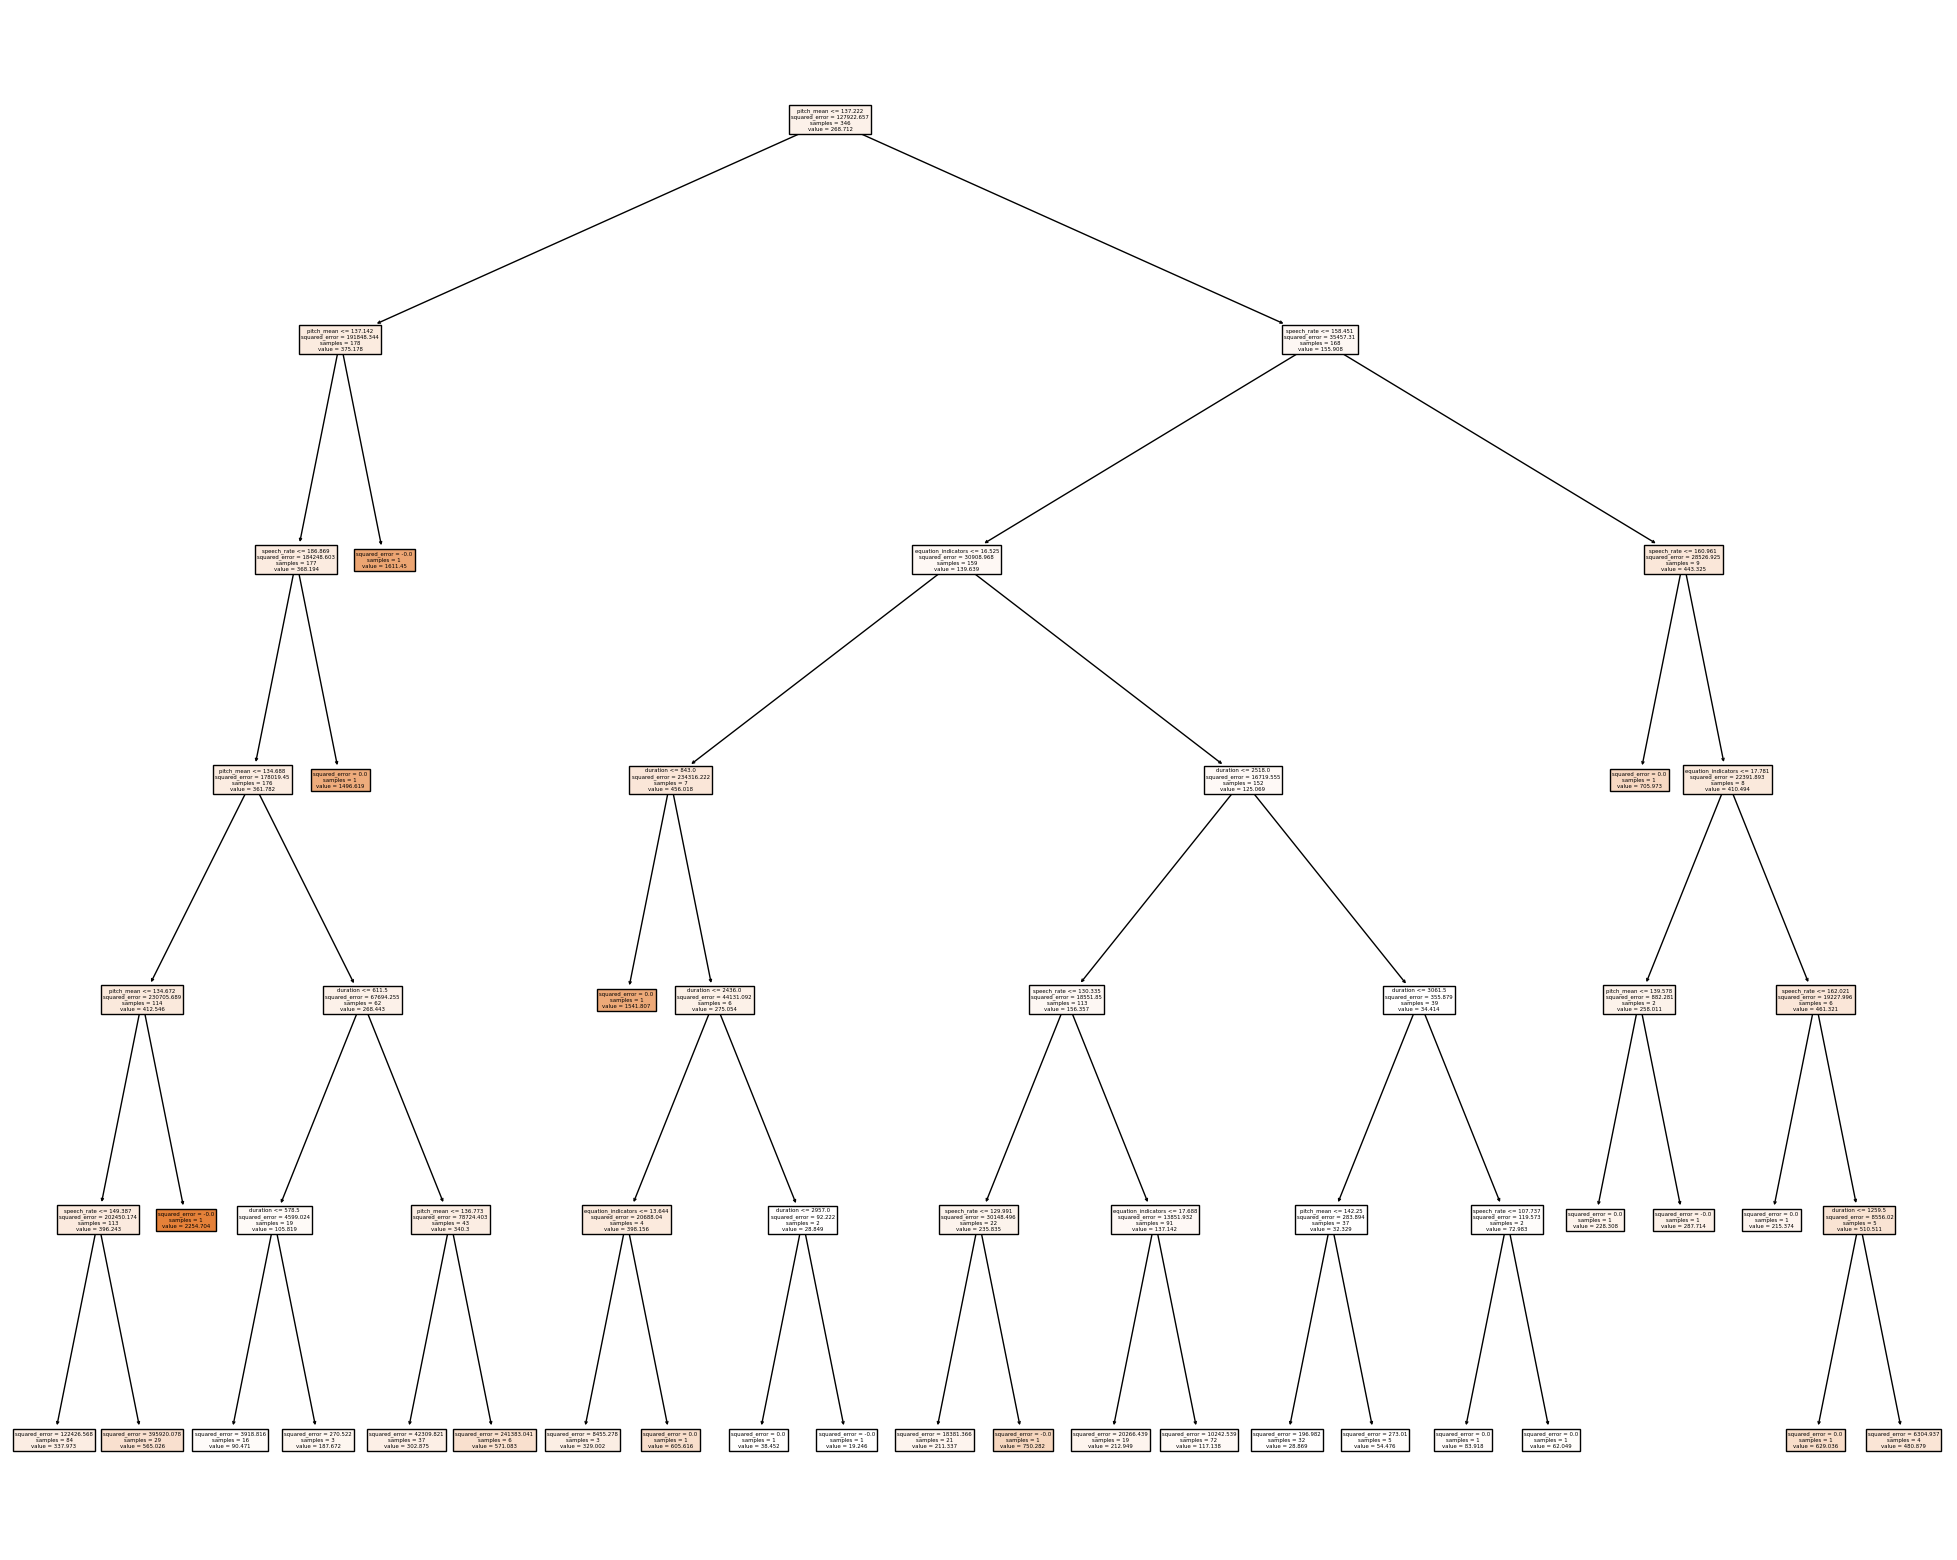

In [79]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg_tree, 
                   filled=True, feature_names=['speech_rate', 'pitch_mean', 'equation_indicators', 'duration'])
plt.plot()